In [ ]:
#This part of code is about reproducing the results based on the paper 'Recognising Family, 
#Genus, and Species of Anuran Using a Hierarchical Classification Approach (2016)', which 
#is regarded as #the reference paper of my project. 

#The classification method used in our reference paper is 'K Nearest Neighbour'. Here I 
#developed the same method to produce the result and deliver analysis  


In [1]:
from sklearn import decomposition
from sklearn import datasets

import pandas as pd
import pylab as pl

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs

from pandas.tools.plotting import parallel_coordinates

%pylab inline
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GroupKFold
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.model_selection import GridSearchCV

Populating the interactive namespace from numpy and matplotlib


In [2]:
#loading data via Pandas Dataframe 
data = pd.read_csv('C:/Users/zhanghui/Desktop/PROJECT/Frogs_MFCCs.csv')

In [3]:
#Our data is composed of 24-dimensional features, from MFCC_1 to MFCC_22, and 3-level multi classes, 
#Family, Genus and Species.

#The last column is about the identity mark of the individual frog sample 

data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [ ]:
#Data visualisation process  

In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
#Family level visualisation

In [10]:
#X_test is about all features to be processed 
X_test = np.array(data.ix[:,:22])

#y_test is about the class label, Family 
y_test = np.array(data['Family'])

In [11]:
X_test.shape

(7195, 22)

In [12]:
#list of all possible labels in Family class 
np.unique(y_test)

array(['Bufonidae', 'Dendrobatidae', 'Hylidae', 'Leptodactylidae'], dtype=object)

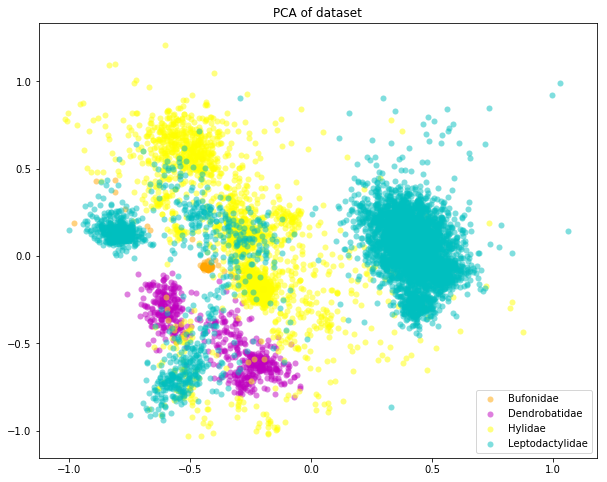

In [13]:
#Application of PCA technique to transform the original 24-dimensions data into 2-dimensions for visualisation plot
y_targetnames = ['Bufonidae', 'Dendrobatidae', 'Hylidae', 'Leptodactylidae']

pca = PCA(n_components=2)
X_test_r = pca.fit_transform(X_test)

plt.figure(figsize=(10,8))
colors = ['orange', 'm', 'yellow', 'c']
lw = .02

for color, target_name in zip(colors, y_targetnames):
    plt.scatter(X_test_r[y_test == target_name, 0], X_test_r[y_test == target_name, 1], alpha=.5, color=color,
               lw=lw, label = target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.show()

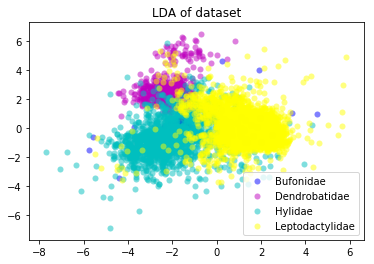

In [14]:
#Application of LDA technique to transform the original 24-dimensions data into 2-dimensions for visualisation plot
lda = LinearDiscriminantAnalysis(n_components=2)
X_test_r2 = lda.fit(X_test, y_test).transform(X_test)

plt.figure()

colors = ['b', 'm', 'c', 'yellow']
lw = .02

for color, target_name in zip(colors, y_targetnames):
    plt.scatter(X_test_r2[y_test == target_name, 0], X_test_r2[y_test == target_name, 1], alpha=.5, color=color,
               lw=lw, label = target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('LDA of dataset')

plt.show()

In [ ]:
#Genus level visualisation

In [18]:
#y_test2 is about the class label, Genus
y_test_2 = np.array(data['Genus'])

#list of all possible labels in Genus class 
np.unique(y_test_2)

array(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'], dtype=object)

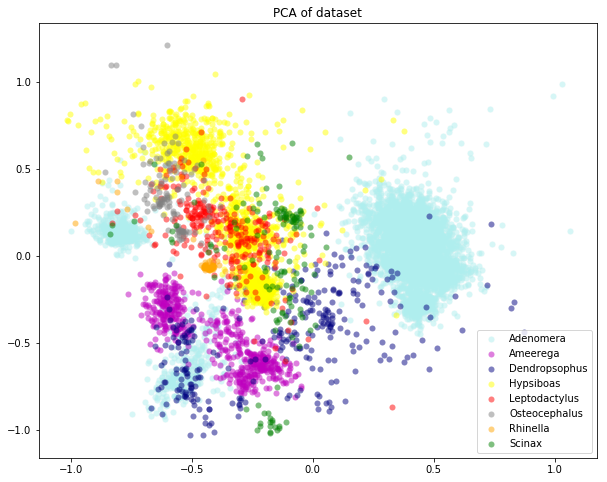

In [21]:
y_targetnames = ['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax']

pca = PCA(n_components=2)
X_test_r = pca.fit_transform(X_test)

plt.figure(figsize=(10,8))
colors = ['paleturquoise', 'm', 'navy', 'yellow', 'red', 'gray', 'orange', 'green']
lw = .02

for color, target_name in zip(colors, y_targetnames):
    plt.scatter(X_test_r[y_test_2 == target_name, 0], X_test_r[y_test_2 == target_name, 1], alpha=.5, color=color,
                lw=lw, label = target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.show()

In [ ]:
#Species level visualisation

In [22]:
#y_test3 is about the class label, Species 
y_test3 = np.array(data['Species'])

#list of all possible labels in Species class
np.unique(y_test3)

array(['AdenomeraAndre', 'AdenomeraHylaedactylus', 'Ameeregatrivittata',
       'HylaMinuta', 'HypsiboasCinerascens', 'HypsiboasCordobae',
       'LeptodactylusFuscus', 'OsteocephalusOophagus', 'Rhinellagranulosa',
       'ScinaxRuber'], dtype=object)

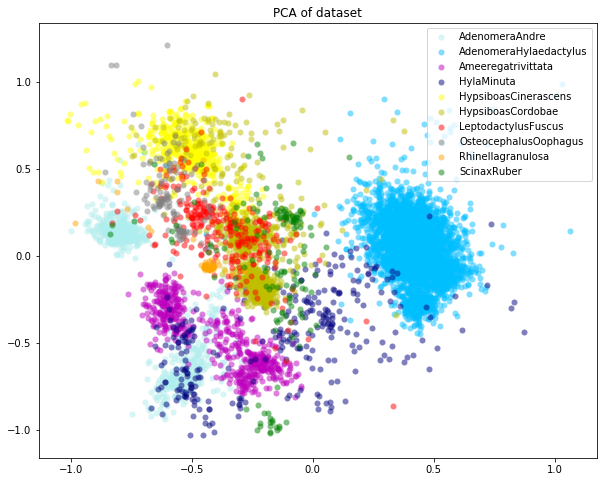

In [23]:
y_targetnames = ['AdenomeraAndre','AdenomeraHylaedactylus', 'Ameeregatrivittata', 'HylaMinuta', 'HypsiboasCinerascens',
                 'HypsiboasCordobae', 'LeptodactylusFuscus', 'OsteocephalusOophagus',
                 'Rhinellagranulosa', 'ScinaxRuber']

pca = PCA(n_components=2)
X_test_r = pca.fit_transform(X_test)

plt.figure(figsize=(10,8))
colors = ['paleturquoise', 'deepskyblue', 'm', 'navy', 'yellow', 'y', 'red', 'gray', 'orange', 'green']
lw = .02

for color, target_name in zip(colors, y_targetnames):
    plt.scatter(X_test_r[y_test3 == target_name, 0], X_test_r[y_test3 == target_name, 1], alpha=.5, color=color,
                lw=lw, label = target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of dataset')

plt.show()

In [ ]:
#model training procedure 


In [214]:
#knn clasification for hirechical classification 

In [5]:
#sample data with Family label 

X_test = np.array(data.ix[:,:22])

y_test = np.array(data['Family'])

In [6]:
#crossvalidation

#Here we need to consider about the group information, that all voice smaple data from one single frog should
#be processed together to avoid overfitting

groups = np.array(data['RecordID'])
gkf = GroupKFold(n_splits=60)
gkf.split(X_test, y_test, groups)

#We followed the reference paper expriment setup that parameter 'K' in KNN equals to 3
n_neighbors = 3

#estimotar
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform').fit(X_test, y_test)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_test, y_test)

#crossvalidation
cross_val_score(clf, X_test, y_test, cv=list(gkf.split(X_test, y_test, groups))).mean()

#crossvalidatepredict
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(clf, X_test, y_test, cv=list(gkf.split(X_test, y_test, groups)))

In [10]:
cross_val_score(clf, X_test, y_test, cv=list(gkf.split(X_test, y_test, groups))).mean()

0.84884243816065508

In [8]:
#to recall the family labels list for further matrix building 
np.unique(y_test)

array(['Bufonidae', 'Dendrobatidae', 'Hylidae', 'Leptodactylidae'], dtype=object)

In [14]:
#matrix on family level
result = np.c_[y_test, predicted]

Bufonidae = 0
Dendrobatidae = 0
Hylidae = 0
Leptodactylidae = 0
total = 0

for i in range(len(y_test)):
    if result[:, 0][i] == 'Bufonidae':
        total += 1
        if result[:, 1][i] == 'Bufonidae':
            Bufonidae += 1
        if result[:, 1][i] == 'Dendrobatidae':
            Dendrobatidae += 1
        if result[:, 1][i] == 'Hylidae':
            Hylidae += 1
        if result[:, 1][i] == 'Leptodactylidae':
            Leptodactylidae += 1


Bufonidae, Dendrobatidae, Hylidae, Leptodactylidae, total

(57, 0, 3, 8, 68)

In [322]:
#fit the data into array type 
data = np.array(data)
data.shape

(7195, 26)

In [535]:
#To copy the data predicted

X_Bufonidae = list()
y_Bufonidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Bufonidae':
        X_Bufonidae.append(data[i])
        
X_Bufonidae = np.array(X_Bufonidae)
y_Bufonidae = np.array(X_Bufonidae[:,23])

#To copy the data predicted to be Dendrobatidae

X_Dendrobatidae = list()
y_Dendrobatidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Dendrobatidae':
        X_Dendrobatidae.append(data[i])

        
X_Dendrobatidae = np.array(X_Dendrobatidae)
y_Dendrobatidae = np.array(X_Dendrobatidae[:,23])

#To copy the data predicted to be Hylidae

X_Hylidae = list()
y_Hylidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Hylidae':
        X_Hylidae.append(data[i])
        
X_Hylidae = np.array(X_Hylidae)
y_Hylidae = np.array(X_Hylidae[:,23])

#To copy the data predicted to be Leptodactylidae

X_Leptodactylidae = list()
y_Leptodactylidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Leptodactylidae':
        X_Leptodactylidae.append(data[i])
        
X_Leptodactylidae = np.array(X_Leptodactylidae)
y_Leptodactylidae = np.array(X_Leptodactylidae[:,23])


In [537]:
#groups message of Leptodactylidae
print(np.unique(X_Leptodactylidae[:,25]).size)
groups_Leptodactylidae = np.array(X_Leptodactylidae[:,25])

43


In [538]:
X_Leptodactylidae = X_Leptodactylidae[:, :22]
X_Leptodactylidae.shape
y_Leptodactylidae.shape

(4271,)

In [539]:
#prediction process of Leptodactylidae

#crossvalidation
gkf = GroupKFold(n_splits=43)
gkf.split(X_Leptodactylidae, y_Leptodactylidae, groups_Leptodactylidae)


#estimotar
n_neighbors = 3
clf = knn = neighbors.KNeighborsClassifier(n_neighbors,
                                     weights='uniform').fit(X_Leptodactylidae, y_Leptodactylidae)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Leptodactylidae, y_Leptodactylidae)

#crossvalidatepredict
predicted_Leptodactylidae = cross_val_predict(clf, 
                              X_Leptodactylidae, y_Leptodactylidae, 
                              cv=list(gkf.split(X_Leptodactylidae, y_Leptodactylidae, 
                                                groups_Leptodactylidae)))
metrics.accuracy_score(y_Leptodactylidae, predicted_Leptodactylidae)

0.91453992039335052

In [540]:
np.unique(y_Leptodactylidae)

array(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella'], dtype=object)

In [541]:
#matrix on Genus level derived from the prediction results of Leptodactylidae
result_genus = np.c_[y_Leptodactylidae, predicted_Leptodactylidae]

Adenomera = 0
Ameerega = 0
Dendropsophus = 0
Hypsiboas = 0
Leptodactylus = 0
Osteocephalus = 0
Rhinella = 0
Scinax = 0
total = 0

for i in range(len(y_Leptodactylidae)):
    if result_genus[:, 0][i] == 'Rhinella':
        total += 1
        if result_genus[:, 1][i] == 'Adenomera':
            Adenomera += 1
        if result_genus[:, 1][i] == 'Ameerega':
            Ameerega += 1
        if result_genus[:, 1][i] == 'Dendropsophus':
            Dendropsophus += 1
        if result_genus[:, 1][i] == 'Hypsiboas':
            Hypsiboas += 1
        if result_genus[:, 1][i] == 'Leptodactylus':
            Leptodactylus += 1
        if result_genus[:, 1][i] == 'Osteocephalus':
            Osteocephalus += 1
        if result_genus[:, 1][i] == 'Rhinella':
            Rhinella += 1
        if result_genus[:, 1][i] == 'Scinax':
            Scinax += 1

total, Adenomera, Ameerega, Dendropsophus, Hypsiboas, Leptodactylus, Osteocephalus, Rhinella, Scinax

(8, 3, 0, 0, 0, 5, 0, 0, 0)

In [416]:
#total number of predictions of Leptodactylidae
count = 0
for i in range(len(y_Leptodactylidae)):
    if result_genus[:, 1][i] == 'Leptodactylus':
        count += 1
count

426

In [542]:
#groups message of Hylidae

print(np.unique(X_Hylidae[:,25]).size)
groups_Hylidae = np.array(X_Hylidae[:,25])

45


In [543]:
#prediction process of Hylidae

X_Hylidae = X_Hylidae[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=45)
gkf.split(X_Hylidae, y_Hylidae, groups_Hylidae)


#estimotar
n_neighbors = 3
clf = knn = neighbors.KNeighborsClassifier(n_neighbors,
                                     weights='uniform').fit(X_Hylidae, y_Hylidae)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Hylidae, y_Hylidae)

#crossvalidatepredict
predicted_Hylidae = cross_val_predict(clf, 
                              X_Hylidae, y_Hylidae, 
                              cv=list(gkf.split(X_Hylidae, y_Hylidae, 
                                                groups_Hylidae)))
metrics.accuracy_score(y_Hylidae, predicted_Hylidae)

print(np.unique(y_Hylidae))

['Adenomera' 'Ameerega' 'Dendropsophus' 'Hypsiboas' 'Leptodactylus'
 'Osteocephalus' 'Rhinella' 'Scinax']


In [544]:
#matrix on Genus level derived from the prediction results of Hylidae
result_genus = np.c_[y_Hylidae, predicted_Hylidae]

Adenomera = 0
Ameerega = 0
Dendropsophus = 0
Hypsiboas = 0
Leptodactylus = 0
Osteocephalus = 0
Rhinella = 0
Scinax = 0
total = 0

for i in range(len(y_Hylidae)):
    if result_genus[:, 0][i] == 'Ameerega':
        total += 1
        if result_genus[:, 1][i] == 'Adenomera':
            Adenomera += 1
        if result_genus[:, 1][i] == 'Ameerega':
            Ameerega += 1
        if result_genus[:, 1][i] == 'Dendropsophus':
            Dendropsophus += 1
        if result_genus[:, 1][i] == 'Hypsiboas':
            Hypsiboas += 1
        if result_genus[:, 1][i] == 'Leptodactylus':
            Leptodactylus += 1
        if result_genus[:, 1][i] == 'Osteocephalus':
            Osteocephalus += 1
        if result_genus[:, 1][i] == 'Rhinella':
            Rhinella += 1
        if result_genus[:, 1][i] == 'Scinax':
            Scinax += 1

Adenomera, Ameerega, Dendropsophus, Hypsiboas, Leptodactylus, Osteocephalus, Rhinella, Scinax, total

(1, 2, 10, 31, 0, 0, 0, 1, 45)

In [545]:
#predicted total 
print(y_Hylidae.shape)
count = 0
for i in range(len(y_Hylidae)):
    if result_genus[:, 1][i] == 'Adenomera':
        count += 1
count

(2320,)


6

In [546]:
#groups message of Bufonidae

print(np.unique(X_Bufonidae[:,25]).size)
groups_Bufonidae = np.array(X_Bufonidae[:,25])

12


In [547]:
#prediction process of Bufonidae

#crossvalidation
gkf = GroupKFold(n_splits=12)
gkf.split(X_Bufonidae, y_Bufonidae, groups_Bufonidae)


#estimotar
n_neighbors = 3
clf = knn = neighbors.KNeighborsClassifier(n_neighbors,
                                     weights='uniform').fit(X_Bufonidae, y_Bufonidae)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Bufonidae, y_Bufonidae)

#crossvalidatepredict
predicted_Bufonidae = cross_val_predict(clf, 
                              X_Bufonidae, y_Bufonidae, 
                              cv=list(gkf.split(X_Bufonidae, y_Bufonidae, 
                                                groups_Bufonidae)))
metrics.accuracy_score(y_Bufonidae, predicted_Bufonidae)

print(np.unique(y_Bufonidae))

['Adenomera' 'Ameerega' 'Dendropsophus' 'Leptodactylus' 'Osteocephalus'
 'Rhinella' 'Scinax']


In [548]:
#matrix on Genus level derived from the prediction results of Bufonidae

result_genus = np.c_[y_Bufonidae, predicted_Bufonidae]

Adenomera = 0
Ameerega = 0
Dendropsophus = 0
Hypsiboas = 0
Leptodactylus = 0
Osteocephalus = 0
Rhinella = 0
Scinax = 0
total = 0

for i in range(len(y_Bufonidae)):
    if result_genus[:, 0][i] == 'Scinax':
        total += 1
        if result_genus[:, 1][i] == 'Adenomera':
            Adenomera += 1
        if result_genus[:, 1][i] == 'Ameerega':
            Ameerega += 1
        if result_genus[:, 1][i] == 'Dendropsophus':
            Dendropsophus += 1
        if result_genus[:, 1][i] == 'Hypsiboas':
            Hypsiboas += 1
        if result_genus[:, 1][i] == 'Leptodactylus':
            Leptodactylus += 1
        if result_genus[:, 1][i] == 'Osteocephalus':
            Osteocephalus += 1
        if result_genus[:, 1][i] == 'Rhinella':
            Rhinella += 1
        if result_genus[:, 1][i] == 'Scinax':
            Scinax += 1

Adenomera, Ameerega, Dendropsophus, Hypsiboas, Leptodactylus, Osteocephalus, Rhinella, Scinax, total

(0, 0, 0, 0, 0, 0, 9, 0, 9)

In [549]:
#predicted total 
print(y_Bufonidae.shape)
count = 0
for i in range(len(y_Bufonidae)):
    if result_genus[:, 1][i] == 'Rhinella':
        count += 1
count

(209,)


195

In [550]:
#groups message of Dendrobatidae
print(np.unique(X_Dendrobatidae[:,25]).size)
groups_Dendrobatidae = np.array(X_Dendrobatidae[:,25])

16


In [552]:
#training process of Dendrobatidae

X_Dendrobatidae = X_Dendrobatidae[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=16)
gkf.split(X_Dendrobatidae, y_Dendrobatidae, groups_Dendrobatidae)


#estimotar
n_neighbors = 3
clf = knn = neighbors.KNeighborsClassifier(n_neighbors,
                                     weights='uniform').fit(X_Dendrobatidae, y_Dendrobatidae)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Dendrobatidae, y_Dendrobatidae)

#crossvalidatepredict
predicted_Dendrobatidae = cross_val_predict(clf, 
                              X_Dendrobatidae, y_Dendrobatidae, 
                              cv=list(gkf.split(X_Dendrobatidae, y_Dendrobatidae, 
                                                groups_Dendrobatidae)))
metrics.accuracy_score(y_Dendrobatidae, predicted_Dendrobatidae)

print(np.unique(y_Dendrobatidae))

['Adenomera' 'Ameerega' 'Dendropsophus' 'Leptodactylus' 'Scinax']


In [553]:
#matrix on Genus level
result_genus = np.c_[y_Dendrobatidae, predicted_Dendrobatidae]

Adenomera = 0
Ameerega = 0
Dendropsophus = 0
Hypsiboas = 0
Leptodactylus = 0
Osteocephalus = 0
Rhinella = 0
Scinax = 0
total = 0

for i in range(len(y_Dendrobatidae)):
    if result_genus[:, 0][i] == 'Ameerega':
        total += 1
        if result_genus[:, 1][i] == 'Adenomera':
            Adenomera += 1
        if result_genus[:, 1][i] == 'Ameerega':
            Ameerega += 1
        if result_genus[:, 1][i] == 'Dendropsophus':
            Dendropsophus += 1
        if result_genus[:, 1][i] == 'Hypsiboas':
            Hypsiboas += 1
        if result_genus[:, 1][i] == 'Leptodactylus':
            Leptodactylus += 1
        if result_genus[:, 1][i] == 'Osteocephalus':
            Osteocephalus += 1
        if result_genus[:, 1][i] == 'Rhinella':
            Rhinella += 1
        if result_genus[:, 1][i] == 'Scinax':
            Scinax += 1

Adenomera, Ameerega, Dendropsophus, Hypsiboas, Leptodactylus, Osteocephalus, Rhinella, Scinax, total

(0, 332, 1, 0, 0, 0, 0, 0, 333)

In [554]:
#predicted total 
print(y_Dendrobatidae.shape)
count = 0
for i in range(len(y_Dendrobatidae)):
    if result_genus[:, 1][i] == 'Ameerega':
        count += 1
count

(395,)


393

In [555]:
#knn on species level:
data = np.array(data)
data.shape

(7195, 26)

In [556]:
np.unique(data[:, 23])

array(['Adenomera', 'Ameerega', 'Dendropsophus', 'Hypsiboas',
       'Leptodactylus', 'Osteocephalus', 'Rhinella', 'Scinax'], dtype=object)

In [559]:
#To copy the data predicted
X_Leptodactylidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Leptodactylidae':
        X_Leptodactylidae.append(data[i])        
X_Leptodactylidae = np.array(X_Leptodactylidae)

X_Dendrobatidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Dendrobatidae':
        X_Dendrobatidae.append(data[i])        
X_Dendrobatidae = np.array(X_Dendrobatidae)

X_Hylidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Hylidae':
        X_Hylidae.append(data[i])
X_Hylidae = np.array(X_Hylidae)

X_Bufonidae = list()
for i in range(len(predicted)):
    if predicted[i] == 'Bufonidae':
        X_Bufonidae.append(data[i])        
X_Bufonidae = np.array(X_Bufonidae)

#To copy the data predicted to be Adenomera
X_Adenomera = list()
y_Adenomera = list()
for i in range(len(predicted_Leptodactylidae)):
    if predicted_Leptodactylidae[i] == 'Adenomera':
        X_Adenomera.append(X_Leptodactylidae[i])
        
X_Adenomera = np.array(X_Adenomera)
y_Adenomera = np.array(X_Adenomera[:,24])

#To copy the data predicted to be Leptodactylus
X_Leptodactylus = list()
y_Leptodactylus = list()
for i in range(len(predicted_Leptodactylidae)):
    if predicted_Leptodactylidae[i] == 'Leptodactylus':
        X_Leptodactylus.append(X_Leptodactylidae[i])
        
X_Leptodactylus = np.array(X_Leptodactylus)
y_Leptodactylus = np.array(X_Leptodactylus[:,24])


#To copy the data predicted to be Scinax 
X_Scinax  = list()
y_Scinax  = list()
for i in range(len(predicted_Hylidae )):
    if predicted_Hylidae[i] == 'Scinax':
        X_Scinax.append(X_Hylidae[i])

        
X_Scinax = np.array(X_Scinax)
y_Scinax = np.array(X_Scinax[:,24])


#To copy the data predicted to be Hypsiboas
X_Hypsiboas = list()
y_Hypsiboas = list()
for i in range(len(predicted_Hylidae)):
    if predicted_Hylidae[i] == 'Hypsiboas':
        X_Hypsiboas.append(X_Hylidae[i])
        
X_Hypsiboas = np.array(X_Hypsiboas)
y_Hypsiboas = np.array(X_Hypsiboas[:,24])


#To copy the data predicted to be Osteocephalus
X_Osteocephalus = list()
y_Osteocephalus = list()
for i in range(len(predicted_Hylidae)):
    if predicted_Hylidae[i] == 'Osteocephalus':
        X_Osteocephalus.append(X_Hylidae[i])
        
X_Osteocephalus = np.array(X_Osteocephalus)
y_Osteocephalus = np.array(X_Osteocephalus[:,24])


#To copy the data predicted to be Dendropsophus
X_Dendropsophus = list()
y_Dendropsophus = list()
for i in range(len(predicted_Hylidae)):
    if predicted_Hylidae[i] == 'Dendropsophus':
        X_Dendropsophus.append(X_Hylidae[i])
        
X_Dendropsophus = np.array(X_Dendropsophus)
y_Dendropsophus = np.array(X_Dendropsophus[:,24])


#To copy the data predicted to be Rhinella
X_Rhinella = list()
y_Rhinella = list()
for i in range(len(predicted_Bufonidae  )):
    if predicted_Bufonidae  [i] == 'Rhinella':
        X_Rhinella.append(X_Bufonidae[i])
        
X_Rhinella = np.array(X_Rhinella)
y_Rhinella = np.array(X_Rhinella[:,24])


#To copy the data predicted to be Ameerega
X_Ameerega = list()
y_Ameerega = list()
for i in range(len(predicted_Dendrobatidae)):
    if predicted_Dendrobatidae[i] == 'Ameerega':
        X_Ameerega.append(X_Dendrobatidae[i])
        
X_Ameerega = np.array(X_Ameerega)
y_Ameerega = np.array(X_Ameerega[:,24])

In [560]:
#groups message of Leptodactylus
print(np.unique(X_Leptodactylus[:,25]).size)
groups_Leptodactylus = np.array(X_Leptodactylus[:,25])

11


In [561]:
#Leptodactylus

X_Leptodactylus = X_Leptodactylus[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=11)

#estimotar
n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Leptodactylus, y_Leptodactylus)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Leptodactylus, y_Leptodactylus)

#crossvalidatepredict
predicted_Leptodactylus = cross_val_predict(clf, 
                              X_Leptodactylus, y_Leptodactylus, 
                              cv=list(gkf.split(X_Leptodactylus, y_Leptodactylus, 
                                                groups_Leptodactylus)))

print(np.unique(y_Leptodactylus))

['AdenomeraAndre' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa']


In [562]:
#matrix on Species level
result_species = np.c_[y_Leptodactylus, predicted_Leptodactylus]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Leptodactylus)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [563]:
#predicted total 
print(y_Leptodactylus.shape)
count = 0
for i in range(len(y_Leptodactylus)):
    if result_species[:, 1][i] == 'LeptodactylusFuscus':
        count += 1
count

(426,)


254

In [564]:


#groups message of Adenomera
print(np.unique(X_Adenomera[:,25]).size)
groups_Adenomera = np.array(X_Adenomera[:,25])

37


In [565]:
#Adenomera

X_Adenomera = X_Adenomera[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=37)

#estimotar
n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Adenomera, y_Adenomera)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Adenomera, 
                                  y_Adenomera)

#crossvalidatepredict
predicted_Adenomera = cross_val_predict(clf, 
                              X_Adenomera, y_Adenomera, 
                              cv=list(gkf.split(X_Adenomera, 
                                                y_Adenomera, 
                                                groups_Adenomera)))

print(np.unique(y_Adenomera))

['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'Rhinellagranulosa']


In [575]:
#matrix on Species level
result_species = np.c_[y_Adenomera, predicted_Adenomera]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Adenomera)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [578]:
#predicted total 
print(y_Adenomera.shape)
count = 0
for i in range(len(y_Adenomera)):
    if result_species[:, 1][i] == 'AdenomeraAndre':
        count += 1
count

(3786,)


317

In [579]:

#groups message of Dendropsophus
print(np.unique(X_Dendropsophus[:,25]).size)
groups_Dendropsophus = np.array(X_Dendropsophus[:,25])

24


In [581]:
#Dendropsophus

X_Dendropsophus = X_Dendropsophus[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=24)

#estimotar
n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Dendropsophus, y_Dendropsophus)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Dendropsophus, 
                                  y_Dendropsophus)

#crossvalidatepredict
predicted_Dendropsophus = cross_val_predict(clf, 
                              X_Dendropsophus, y_Dendropsophus, 
                              cv=list(gkf.split(X_Dendropsophus, 
                                                y_Dendropsophus, 
                                                groups_Dendropsophus)))

print(np.unique(y_Dendropsophus))

['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HylaMinuta' 'HypsiboasCordobae' 'LeptodactylusFuscus' 'ScinaxRuber']


In [591]:
#matrix on Species level
result_species = np.c_[y_Dendropsophus, predicted_Dendropsophus]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Dendropsophus)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 26)

In [592]:
#predicted total 
print(y_Dendropsophus.shape)
count = 0
for i in range(len(y_Dendropsophus)):
    if result_species[:, 1][i] == 'HylaMinuta':
        count += 1
count

(335,)


333

In [593]:

#groups message of Scinax
print(np.unique(X_Scinax[:,25]).size)
groups_Scinax = np.array(X_Scinax[:,25])

11


In [595]:
#Scinax

X_Scinax = X_Scinax[:, :22]


#crossvalidation
gkf = GroupKFold(n_splits=11)

#estimotar
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Scinax, y_Scinax)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Scinax, 
                                  y_Scinax)

#crossvalidatepredict
predicted_Scinax = cross_val_predict(clf, 
                              X_Scinax, y_Scinax, 
                              cv=list(gkf.split(X_Scinax, 
                                                y_Scinax, 
                                                groups_Scinax)))

print(np.unique(y_Scinax))

['AdenomeraHylaedactylus' 'Ameeregatrivittata' 'HylaMinuta'
 'HypsiboasCordobae' 'Rhinellagranulosa' 'ScinaxRuber']


In [606]:
#matrix on Species level
result_species = np.c_[y_Scinax, predicted_Scinax]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Scinax)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 1, 0, 0, 0, 0, 0, 0, 0, 91, 92)

In [607]:
#predicted total 
print(y_Scinax.shape)
count = 0
for i in range(len(y_Scinax)):
    if result_species[:, 1][i] == 'ScinaxRuber':
        count += 1
count

(109,)


101

In [608]:

#groups message of Osteocephalus
print(np.unique(X_Osteocephalus[:,25]).size)
groups_Osteocephalus = np.array(X_Osteocephalus[:,25])

12


In [610]:
#Osteocephalus

X_Osteocephalus = X_Osteocephalus[:, :22]


#crossvalidation
gkf = GroupKFold(n_splits=12)

#estimotar
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Osteocephalus, y_Osteocephalus)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Osteocephalus, 
                                  y_Osteocephalus)

#crossvalidatepredict
predicted_Osteocephalus = cross_val_predict(clf, 
                              X_Osteocephalus, y_Osteocephalus, 
                              cv=list(gkf.split(X_Osteocephalus, 
                                                y_Osteocephalus, 
                                                groups_Osteocephalus)))

print(np.unique(y_Osteocephalus))

['AdenomeraAndre' 'HypsiboasCinerascens' 'HypsiboasCordobae'
 'LeptodactylusFuscus' 'OsteocephalusOophagus' 'Rhinellagranulosa'
 'ScinaxRuber']


In [620]:
#matrix on Species level
result_species = np.c_[y_Osteocephalus, predicted_Osteocephalus]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Osteocephalus)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 7)

In [621]:
#predicted total 
print(y_Osteocephalus.shape)
count = 0
for i in range(len(y_Osteocephalus)):
    if result_species[:, 1][i] == 'OsteocephalusOophagus':
        count += 1
count

(195,)


182

In [622]:

#groups message of Hypsiboas
print(np.unique(X_Hypsiboas[:,25]).size)
groups_Hypsiboas = np.array(X_Hypsiboas[:,25])

25


In [623]:
#Hypsiboas
X_Hypsiboas = X_Hypsiboas[:, :22]


#crossvalidation
gkf = GroupKFold(n_splits=25)

#estimotar
n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Hypsiboas, y_Hypsiboas)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Hypsiboas, 
                                  y_Hypsiboas)

#crossvalidatepredict
predicted_Hypsiboas = cross_val_predict(clf, 
                              X_Hypsiboas, y_Hypsiboas, 
                              cv=list(gkf.split(X_Hypsiboas, 
                                                y_Hypsiboas, 
                                                groups_Hypsiboas)))

print(np.unique(y_Hypsiboas))

['AdenomeraAndre' 'AdenomeraHylaedactylus' 'Ameeregatrivittata'
 'HypsiboasCinerascens' 'HypsiboasCordobae' 'LeptodactylusFuscus'
 'OsteocephalusOophagus' 'Rhinellagranulosa' 'ScinaxRuber']


In [633]:
#matrix on Species level
result_species = np.c_[y_Hypsiboas, predicted_Hypsiboas]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Hypsiboas)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 12)

In [635]:
#predicted total 
print(y_Hypsiboas.shape)
count = 0
for i in range(len(y_Hypsiboas)):
    if result_species[:, 1][i] == 'HypsiboasCordobae':
        count += 1
count

(1670,)


1198

In [636]:

#groups message of Rhinella
print(np.unique(X_Rhinella[:,25]).size)
groups_Rhinella = np.array(X_Rhinella[:,25])

11


In [638]:
#Rhinella
X_Rhinella = X_Rhinella[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=11)

#estimotar
n_neighbors = 2
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Rhinella, y_Rhinella)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Rhinella, 
                                  y_Rhinella)

#crossvalidatepredict
predicted_Rhinella = cross_val_predict(clf, 
                              X_Rhinella, y_Rhinella, 
                              cv=list(gkf.split(X_Rhinella, 
                                                y_Rhinella, 
                                                groups_Rhinella)))

print(np.unique(y_Rhinella))

['Ameeregatrivittata' 'HylaMinuta' 'LeptodactylusFuscus'
 'OsteocephalusOophagus' 'Rhinellagranulosa' 'ScinaxRuber']


In [648]:
#matrix on Species level
result_species = np.c_[y_Rhinella, predicted_Rhinella]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Rhinella)):
    if result_species[:, 0][i] == 'ScinaxRuber':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 9)

In [649]:
#predicted total 
print(y_Rhinella.shape)
count = 0
for i in range(len(y_Rhinella)):
    if result_species[:, 1][i] == 'Rhinellagranulosa':
        count += 1
count

(195,)


193

In [650]:

#groups message of Ameerega
print(np.unique(X_Ameerega[:,25]).size)
groups_Ameerega = np.array(X_Ameerega[:,25])

15


In [664]:
#Ameerega

X_Ameerega = X_Ameerega[:, :22]

#crossvalidation
gkf = GroupKFold(n_splits=15)

#estimotar
n_neighbors = 3
knn = neighbors.KNeighborsClassifier(n_neighbors,
        weights='uniform').fit(X_Ameerega, y_Ameerega)

#onevsone
clf = OneVsOneClassifier(knn).fit(X_Ameerega, 
                                  y_Ameerega)

#crossvalidatepredict
predicted_Ameerega = cross_val_predict(clf, 
                              X_Ameerega, y_Ameerega, 
                              cv=list(gkf.split(X_Ameerega, 
                                                y_Ameerega, 
                                                groups_Ameerega)))

print(np.unique(y_Ameerega))

['AdenomeraAndre' 'Ameeregatrivittata' 'HylaMinuta' 'LeptodactylusFuscus'
 'ScinaxRuber']


In [668]:
#matrix on species level
result_species = np.c_[y_Ameerega, predicted_Ameerega]

AdenomeraAndre = 0
AdenomeraHylaedactylus = 0
Ameeregatrivittata = 0
HylaMinuta = 0
HypsiboasCinerascens = 0
HypsiboasCordobae = 0
LeptodactylusFuscus = 0
OsteocephalusOophagus = 0
Rhinellagranulosa = 0
ScinaxRuber = 0
total = 0

for i in range(len(y_Ameerega)):
    if result_species[:, 0][i] == 'LeptodactylusFuscus':
        total += 1
        if result_species[:, 1][i] == 'AdenomeraAndre':
            AdenomeraAndre += 1
        if result_species[:, 1][i] == 'AdenomeraHylaedactylus':
            AdenomeraHylaedactylus += 1
        if result_species[:, 1][i] == 'Ameeregatrivittata':
            Ameeregatrivittata += 1
        if result_species[:, 1][i] == 'HylaMinuta':
            HylaMinuta += 1
        if result_species[:, 1][i] == 'HypsiboasCinerascens':
            HypsiboasCinerascens += 1
        if result_species[:, 1][i] == 'HypsiboasCordobae':
            HypsiboasCordobae += 1
        if result_species[:, 1][i] == 'LeptodactylusFuscus':
            LeptodactylusFuscus += 1
        if result_species[:, 1][i] == 'OsteocephalusOophagus':
            OsteocephalusOophagus += 1
        if result_species[:, 1][i] == 'Rhinellagranulosa':
            Rhinellagranulosa += 1
        if result_species[:, 1][i] == 'ScinaxRuber':
            ScinaxRuber += 1

AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HylaMinuta,HypsiboasCinerascens,HypsiboasCordobae,LeptodactylusFuscus,OsteocephalusOophagus,Rhinellagranulosa,ScinaxRuber,total

(0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2)

In [663]:
#predicted total 
print(y_Ameerega.shape)
count = 0
for i in range(len(y_Ameerega)):
    if result_species[:, 1][i] == 'Ameeregatrivittata':
        count += 1
count

(393,)


331